# Chapter 6 Distributions #
&copy; 2019 Kenneth Winston

We noted at the beginning of Chapter 4 that Louis Bachelier's 1900 PhD thesis was far ahead of its time in its use of Brownian motion to model changes in financial markets. The basic assumption of Gaussian/normal (or lognormal) changes in financial values seems plausible, and many subsequent modelers simply assumed normality.

There's a reason why normality seems, well, normal: the [Central Limit Theorem](#central_limit_theorem), which says that averages of reasonably well-behaved distributions eventually start to look Gaussian. So if (say) one-second changes in prices are generated by reasonably well-behaved distributions that satisfy the conditions of the [Central Limit Theorem](#central_limit_theorem), then one-day price changes might start to look normal. Indeed, a histogram of price changes (more precisely, a histogram of logarithms of price change relatives) usually will have the roughly unimodal, symmetric, bell-shaped look of a Gaussian.

But empiricists[$^1$](#six_footnotes) soon began to notice that price changes were too "peaked" to be samples of a normal distribution. Here "peaked" means that very small and very large changes happen far more frequently than a normal distribution would predict, while middling changes happen less frequently. Such distributions &mdash; in which large changes happen more often than in a Gaussian &mdash; are called **`fat-tailed`**. If the [Central Limit Theorem](#central_limit_theorem) fails empirically, then the component distributions must not be well-behaved in the way the [Central Limit Theorem](#central_limit_theorem) requires.

<a name="mandlebrot"></a>In 1963, [Benoit Mandlebrot](https://www.jstor.org/stable/2350970) analyzed price changes in cotton and concluded that stable Paretian distributions with infinite variances gave better explanations of sample behavior than normal distributions. The [Central Limit Theorem](#central_limit_theorem) requires the component distributions to have finite variances, but Mandlebrot thought that this condition was violated.

Most current financial economists think Mandlebrot was right about non-normality, but was wrong about the reason for it. The condition that is currently thought to be the culprit is independence: in our example, every second's price increment must be independent of every other second's price increment for the [Central Limit Theorem](#central_limit_theorem) to apply. If increments aren't independent, then behavior very much like observed behavior can occur.

We'll discuss two fat-tailed distributions that are often used to generate more realistic patterns than a normal distribution: Student's T and a mixture of normals.

We will also discuss extreme value distributions, which are fat-tailed and which are particularly helpful for modeling peril-type risks.

## 6.1 Central Limit Theorem
<a name="central_limit_theorem"></a>

There are many versions of the **`Central Limit Theorem ("CLT")`**. What they have in common is the idea that in the limit, the average of ever-larger numbers of distributions is distributed normally. The distributions being averaged must be independent, and some of their moments must be finite.

We'll use the following version$^2$:
><u>**Central Limit Theorem (Lyapunov-Lindeberg)**</u>. Let $\{X_i\}$ be a discrete scalar stochastic process where each pair $\{X_i,X_j\}$ is independent. Suppose each mean $\mu_i=\mathbb{E}[X_i]$ and each variance $\sigma_i^2=\mathbb{E}[(X_i-\mu_i)^2]$ is defined and finite. Define $s_n^2=\sum_{i=1}^n\sigma_i^2$, and suppose that
$$\lim_{n\to\infty}\frac{1}{s_n^2}\sum_{i=1}^n\mathbb{E}[(X_i-\mu_i)^2 \delta(|X_i-\mu_i|>\epsilon s_n)]=0\quad\forall \epsilon>0\label{eq:lindeberg_condition}\tag{6.1}$$
where $\delta(b)=1$ if $b$ is true and $\delta(b)=0$ otherwise. Then if we define the standardized average
$$Z_n=\frac{\sum_{i=1}^n{\bigl(X_n-\mu_n\bigr)}}{s_n}\label{eq:lyapunov_zscore}\tag{6.2}$$
and if $F_{Z_n}(x)$ is the cumulative distribution function of $Z_n$, we have
$$\lim_{n\to\infty}F_{Z_n}(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^x{\exp\bigl(-\frac{t^2}{2}\bigr)dt}=F_{Norm}(x)\quad\forall x\in\mathbb{R}\label{eq:lyapunov_limit}\tag{6.3}$$

The often-cited Lindeberg-Levy form of the CLT requires **`independent and identically distributed (iid)`** $X_i$. The Lyapunov-Lindeberg form only requires independence; finite first and second moments, and the technical "Lindeberg Condition" \eqref{eq:lindeberg_condition}, which essentially says that the contribution of any individual $X_i$'s variance to the overall variance becomes negligible as $n\to\infty$.

For example, we could take second-by-second observations of the percentage price changes of the Swiss Franc ("Swissie") vs. the dollar. We don’t even need to know what distributions are generating these observations – we could be in a state of Knightian Uncertainty. Each second’s distribution could be different from the next second’s distribution. All we need to know is that each second is independent of each other second; that whatever distributions are generating these price changes don’t “go crazy” with infinite moments; and that each second's variance is a small component of the overall variance, as required by \eqref{eq:lindeberg_condition}. Currencies trade in New York, London, Tokyo, Hong Kong and other venues - say roughly 16 active hours during a day, or 57,600 seconds. If the conditions of the CLT are satisfied, then it's plausible that daily price changes of the Swissie should look normal.



### 6.1.1 Checking Normality: Q-Q Plots
<a name='q_q_plots'></a>

There is a way to demonstrate visually whether or not a sample has been drawn from a particular distribution: it's called a **`Q-Q (quantile-quantile) plot`**. The idea is to sort the sample observations so that $x_1\leq\dots\leq x_n$. We form standardized observations $z_i=\frac{x_i-m}{s}$, where $m=\frac{1}{n}\sum_{i=1}^n x_i$ is the sample mean and $s^2=\frac{1}{n}\sum_{i=1}^n (x_i-m)^2$ is the sample variance. If these were distributed according the cdf $F(x)$, then we could approximate $z_i$ with the inverse distribution function
$$z_i\approx F^{-1}\bigl(\frac{i}{n+1}\bigr)\label{eq:qqplot}\tag{6.4}$$
That is, $F(z_i)\approx\frac{i}{n+1}$. A Q-Q plot is a scatter of $n$ points whose $(x,y)$ coordinates are $(F^{-1}\bigl(\frac{i}{n+1}\bigr),z_i)$. If the sample is close to the desired distribution, then the Q-Q plot should be close to a straight line.

Let's try this for the Swissie; our desired distribution is normal, $F(x)=Norm(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^x\exp\bigl(-\frac{t^2}{2}\bigr)dt$. The observations will be daily log-changes of the Swissie from 1971 to the last yearend.

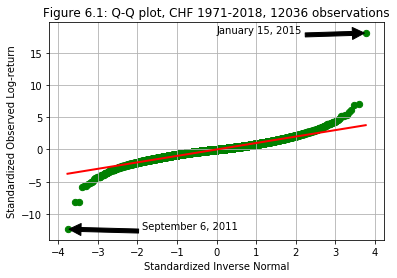

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import qrbook_funcs as qf
from scipy import stats
from tabulate import tabulate
#Get 3 currencies until the end of
#previous year. Form sample covariance matrix
#and do simple efficient frontier calculations

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)

#Convert levels to log-returns
#First take logs of the currency levels
#Currency exchange rates are usually expressed in the direction
#that will make the rate > 1
#Swissie and yen are in currency/dollar, but
#pounds is in dollar/currency. Reverse signs
#so everything is in dollar/currency

#Do each currency separately to account for separate missing data patterns
#dlgs is a list of lists of length 3 corresponding to the 3 currencies
#The value in dlgs is nan if there is missing data for the present or previous day's observation
#Otherwise it is the log of today/yesterday
multipliers=[-1,1,-1]
dlgs=[]
for i in range(len(multipliers)):
    lgrates=[]
    previous=-1
    for t in range(len(ratematrix)):
        if pd.isna(ratematrix[t][i]) or ratematrix[t][i]<=0:
            lgrates.append(np.nan)    #Append a nan
        else:
            if previous < 0:    #This is the first data point
                lgrates.append(np.nan)
            else:
                lgrates.append(np.log(ratematrix[t][i]/previous)*multipliers[i])
            previous=ratematrix[t][i]
    dlgs.append(lgrates)

#dlgs is the transpose of what we want - flip it
dlgs=np.transpose(dlgs)

#Delete any time periods that don't have data
lgdates=[]
difflgs=[]
for t in range(len(dlgs)):
    if all(pd.notna(dlgs[t])):
        #include this time period
        difflgs.append(dlgs[t])
        lgdates.append(cdates[t])


#Make the Q-Q plot of Swiss francs
chf=[row[0] for row in difflgs]
mean=np.mean(chf)
stdev=np.std(chf)
nobs=len(chf)
x=stats.norm.ppf([i/(nobs+1) for i in range(1,nobs+1)])
#Plot the diagonal
line=plt.plot(x, x)
plt.setp(line, linewidth=2, color='r')
#Plot the actuals
y=np.sort(np.array((chf-mean)/stdev))
plt.scatter(x, y, s=40, c='g')
#Find positive outlier
bigplus=max(y)
plt.annotate('January 15, 2015', xy=(max(x), bigplus), xytext=(0, bigplus),
            arrowprops=dict(facecolor='black', shrink=0.02),
            )
bigminus=min(y)
plt.annotate('September 6, 2011', xy=(min(x), bigminus), xytext=(.5*min(x), bigminus),
            arrowprops=dict(facecolor='black', shrink=0.02),
            )
## Configure the graph
plt.title('Figure 6.1: Q-Q plot, CHF '+lgdates[0][:4]+'-'+lastday[:4]+', '+str(nobs)+' observations')
plt.xlabel('Standardized Inverse Normal')
plt.ylabel('Standardized Observed Log-return')
plt.grid(True)
plt.show;

The red straight line shows what Figure 6.1 would look like if Swissie observations were sampled from a normal distribution. They clearly weren't: the green line formed from actual Swissie data is fairly straight in the middle, but begins to curve noticeably away from the red line at about $\pm2.5$ standard deviations. This is a typical fat-tailed ([leptokurtic](#kurtosis)) pattern seen in financial data.

Note for example the more than 12 standard deviation fall of the Swissie (versus the US dollar) in the lower left of the graph. That was on September 6, 2011 when the Swiss National Bank (the [central bank](#central_banking) of Switzerland) announced that they would do [whatever it took](http://www.theguardian.com/business/2011/sep/06/switzerland-pegs-swiss-franc-euro) to devalue the Swissie, effectively pegging it to the cheaper Euro. They felt this was necessary because they were getting less and less competitive, losing out to goods and services denominated in Euros on world markets.
![](swiss_vs_belgian.jpg)
As we will see below, the chance of a 12+ standard deviation move under the assumption of a normal distribution is essentially nil.

On January 15, 2015 the SNB announced that they were [abandoning the ceiling](http://money.cnn.com/2015/01/15/investing/switzerland-euro-currency-ceiling/) on the Swissie’s value and it shot up by 18 standard deviations, an even nil-er chance than before.

### 6.1.2 Jarque-Bera

A more metrical approach to characterizing normality or non-normality is the [Jarque-Bera test](https://doi.org/10.1016%2F0165-1765%2880%2990024-5). This starts from the observation that a normal distribution has zero skewness (third moment) and excess [kurtosis](#kurtosis) (≡kurtosis minus 3):
$$\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}t^3\exp\bigl(-\frac{t^2}{2}\bigr)dt=0;\quad\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}t^4\exp\bigl(-\frac{t^2}{2}\bigr)dt=3\label{eq:jarque_bera_normal}\tag{6.5}$$

The Jarque-Bera test forms a statistic that gets larger as S=skewness and K=(excess [kurtosis](#kurtosis)) depart from zero. This statistic is distributed as chi-squared with two degrees of freedom (scipy.stats.chi2.cdf(x,2)), and gives the probability that the observed distribution is non-normal:
$$JB(S,K)=\frac{n}{6}\bigl(S^2+K^2/4\bigr)\label{eq:jarque_bera_stat}\tag{6.6}$$

For the Swissie series from 1971 through the previous yearend, visual inspection of Figure 6.1 indicates the data is significantly non-normal. This is confirmed by Jarque-Bera:

In [56]:
#Jarque-Bera
sk=stats.skew(chf)
ku=stats.kurtosis(chf)
jb=(nobs/6)*(sk**2+(ku**2)/4)
chi2=stats.chi2.cdf(jb,2)
print('Skewness %f' % sk)
print('Excess Kurtosis %f' % ku)
print('Jarque-Bera Statistic %f' % jb)
print('Chi-squared probability non-normal %f' % chi2)

Skewness 0.397934
Excess Kurtosis 14.079266
Jarque-Bera Statistic 99727.853424
Chi-squared probability non-normal 1.000000


The null hypothesis is that the data is normal; we reject that hypothesis when the chi-squared statistic is above a desired confidence level. For the Swissie data, there is almost perfect confidence in rejecting normality.

### 6.1.3 Causes of non-normality

There are at least two phenomena causing the departures from normality reflected in Figure 6.1 and the Jarque-Bera statistic. One is the presence of a large price-maker in the market. The dynamic behind Brownian motion is a series of random collisions of molecules &mdash; the equivalent of comparatively small price-takers &mdash; on a particle &mdash; the price of the Swissie. If the scientist looking at the particle under the microscope picks up the slide it's on and moves it across the laboratory, that's an intervention on a massively greater scale than random molecule collisions. That's what the Swiss National Bank did on the two highlighted extreme dates.

But even leaving aside the SNB's interventions, there are a good number of observations of regular market days that curve away from the straight (normal) line in Figure 6.1. This empirical failure of the Central Limit Theorem &mdash; significant leptokurtosis &mdash; appears in virtually every financial time series. [Mandlebrot's explanation](#mandlebrot) was essentially that any second could have an arbitrarily large price move, but that doesn't seem consistent with the data. A more reasonable failure point for the Central Limit Theorem's assumptions is independence: there can be periods of systematic trending, so the second-by-second observations don't cancel each other out but rather reinforce each other.

There is a limit to how much weight can be in the tails, imposed by **`Chebyshev's Inequality`**$^3$:
$$Pr\bigl(|X-\mu|\geq k\sigma\bigr)\leq\frac{1}{k^2}\label{eq:chebyshev_inequality}\tag{6.6}$$

This says that the probability of being k standard deviations $\sigma$ away from the mean $\mu$ can be no more than $\frac{1}{k^2}$. Thus a 10 standard deviation event can happen no more than 1/100th of the time. That’s about 2.5 times a year assuming daily periodicity. For a normal distribution, 10 standard deviation events are a lot rarer, as shown in the following table:<a name="normal_probabilities"></a>

In [57]:
#Normal distribution probabilities
print('Normal distribution probabilities (log10)')
for i in range(21):
    print(i,np.log(stats.norm.cdf(-i))/np.log(10))

Normal distribution probabilities (log10)
0 -0.30102999566398114
1 -0.7995455414919703
2 -1.6430160801409373
3 -2.869699035929369
4 -4.49933490755648
5 -6.5426456723906545
6 -9.005864327476706
7 -11.892853637475488
8 -15.206142551017157
9 -18.947464415572387
10 -23.118053405486076
11 -27.718816685046942
12 -32.75043916119186
13 -38.213449847627444
14 -44.108265408505616
15 -50.43521961427551
16 -57.19458380689702
17 -64.38658145667226
18 -72.01139873406754
19 -80.06919233088152
20 -88.5600953430756


The table shows 10 standard deviation events expected to occur in one per $10^{-23}$ periods. The age of the universe$^4$ is less than $10^{13}$ business days, so anything over about 8 standard deviations is effectively never, assuming normality. The fact of the 18 standard deviation event ($10^{-72}$ frequency) in Swissie prices on January 15, 2015 is by itself excellent evidence for non-normality. On the other hand, Chebyshev's Inequality says such events could happen every 324 days &mdash; once per 1.3 years of business days. Observed data seems to be well within Chebyshev's bound but well outside normal.

The apparent violation of the Central Limit Theorem's independence condition is due to the fact that financial markets are populated with humans who react to patterns they perceive in history. We've seen that general idea [expressed in many different ways](caveat_laws). Reactions can be **`procyclical`** (positively correlated with the past) or **`anticyclical`** (negatively correlated with the past); neither reaction is independent of the past.

The oldest continuously operating stock exchange in the world is the [Amsterdam Stock Exchange](https://cup.columbia.edu/book/the-worlds-first-stock-exchange/9780231163781), started in 1602. The oldest continuously operating bond market appears to be for British government debt starting around the formation of the [Bank of England in 1694](https://www.bankofengland.co.uk/about/history).

Otherwise most markets have had lives of less than 200 years$^5$. Sometimes market failures have been accompanied by a violent break in the political system as well, with loss of life being more of a concern than loss of investment. The Russian Revolution repudiated all government debt and abolished private property in a series of steps from 1917 to 1920, so once-thriving stock exchanges in Moscow, Kiev and St. Petersburg had total losses of value. The Chinese government took similar steps from 1949 to 1953; the Cuban government in 1959.

The oldest operating markets have been in existence for about $10^{5}$ days, so we might expect to see a few 4 or 5 standard deviation events during their entire existence. In fact such events are relatively common. On the other hand, overly violent moves are not compatible with ongoing market: a primary market with regular 90% swings in value will simply scare away all participants. So some kind of intermediate distribution - more violent than normal, but less violent than an infinite-variance distribution, seems to be in order.

# Chapter 6 Footnotes
<a name="six_footnotes"></a>

$^1$ It didn't take too long after Bachelier's 1900 thesis for empiricists to notice departures from normality. Benoit Mandlebrot gives credit to a variety of earlier writers for noticing this pheonomenon, going as far back as Wesley C. Mitchell in 1915.

<br>
$^2$ Rick Durett, _Probability: Theory and Examples_, Edition 4.1 (2013, Cambridge University Press), p. 113 (available on https://services.math.duke.edu/~rtd/PTE/PTE4_1.pdf)

<br>
$^3$ Durett, p. 194.

<br>
$^4$ The age of the universe is about 13.75 billion years, which is about $10^{13}$ business days.
https://dx.doi.org/10.1088/0067-0049/192/2/14

<br>
$^5$ Carmen Reinhart and Kenneth Rogoff, _This Time Is Different: Eight Centuries of Financial Folly_, Princeton University Press, 2009. https://press.princeton.edu/titles/8973.html

In [61]:
18**2/252

1.2857142857142858